# NMR processing

##### Imports

In [1]:
from spectrochempy.api import *
import os


        SpectroChemPy's API
        Version   : 0.1a2.post36
        Copyright : 2014-2017 - LCS (Laboratory for Catalysis and Spectrochempy)
            


### import data

In [2]:
path = os.path.join(data, 'nmrdata','bruker', 'tests', 'nmr','bruker_1d')

# load the data in a new dataset
source = NDDataset()
source.read_bruker_nmr(path, expno=1, remove_digital_filter=True)
source

NDDataset([  -0.419,   -0.216, ...,        0,       -0])

##### Plot

<IPython.core.display.Javascript object>


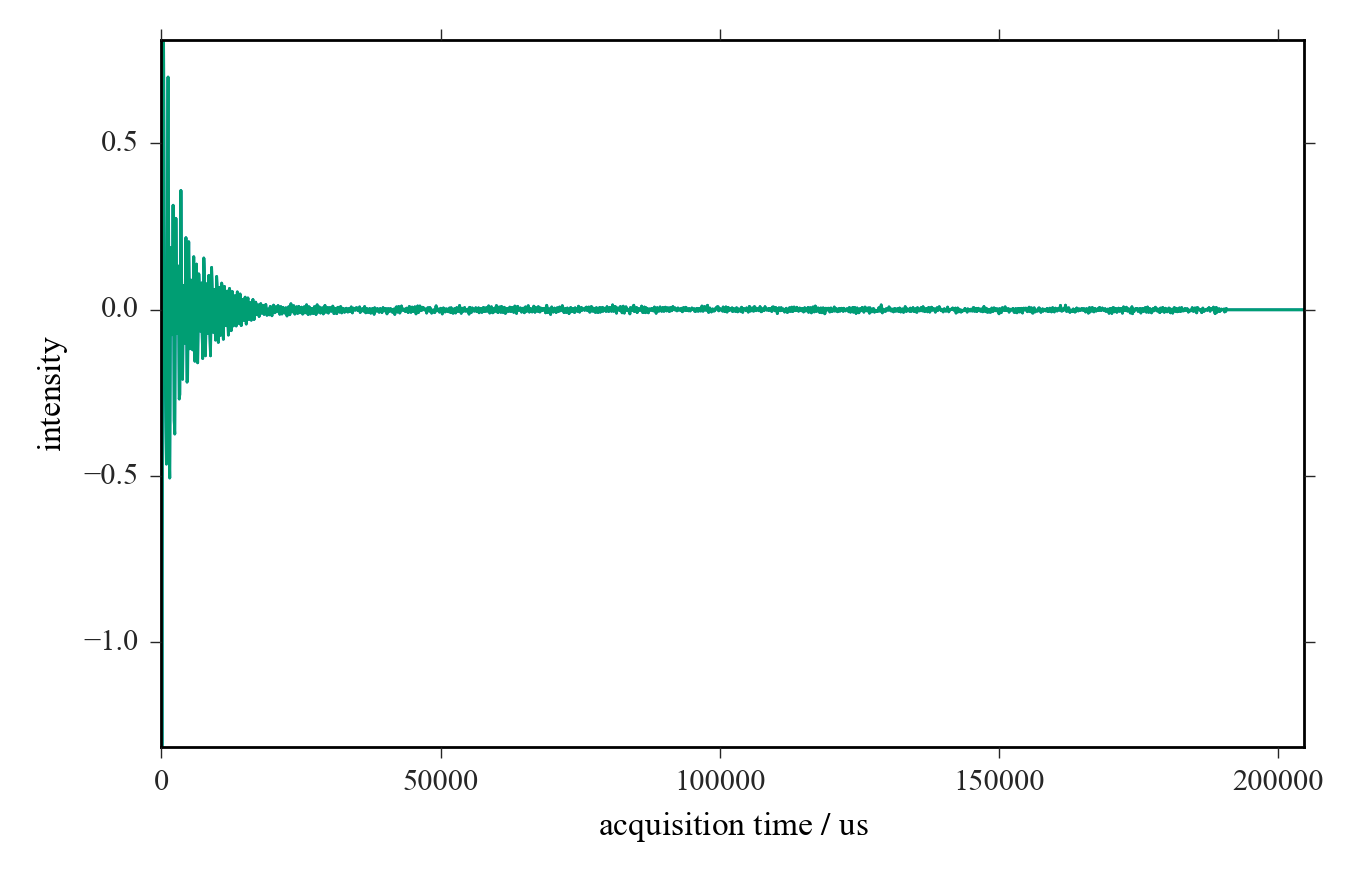

True

In [3]:
source.plot()

In [5]:
lb_source = source.em(lb=10.*ur.Hz)
lb_source.plot()

 ERROR | em apply only to dimensions with [] dimensionality


True

In [5]:
transf = source.fft()
transf.plot()   

True